In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

In [15]:
holiday_events = pd.read_csv('holidays_events.csv')
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [16]:
transaction = pd.read_csv('transactions.csv')
transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [17]:
oil = pd.read_csv('oil.csv')
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [18]:
stores = pd.read_csv('stores.csv')
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [19]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [20]:
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [21]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [22]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [23]:
oil_missing_values = oil['dcoilwtico'].isnull()
print("Total missing values: ", oil_missing_values.sum())

Total missing values:  43


In [24]:
oil_new = oil

In [25]:
oil_new

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


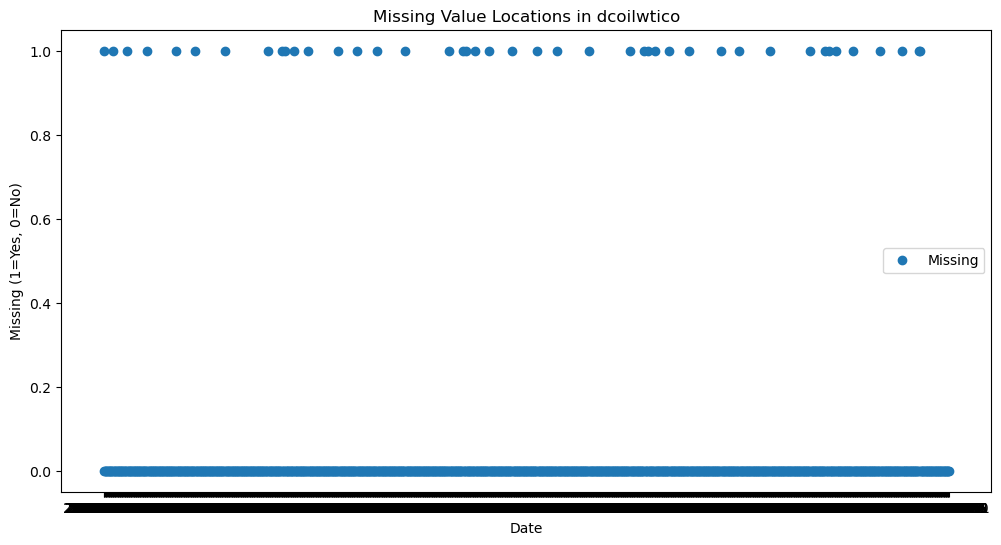

In [26]:

oil_new['is_missing'] = oil_new['dcoilwtico'].isnull()

# Plot the missing values over time
plt.figure(figsize=(12, 6))
plt.plot(oil_new['date'], oil_new['is_missing'], marker='o', linestyle='', label='Missing')
plt.title("Missing Value Locations in dcoilwtico")
plt.xlabel("Date")
plt.ylabel("Missing (1=Yes, 0=No)")
plt.legend()
plt.show()


Missing Proportion by Month:
year_month
2013-01    0.086957
2013-02    0.050000
2013-03    0.047619
2013-04    0.000000
2013-05    0.043478
2013-06    0.000000
2013-07    0.043478
2013-08    0.000000
2013-09    0.047619
2013-10    0.000000
2013-11    0.047619
2013-12    0.045455
2014-01    0.086957
2014-02    0.050000
2014-03    0.000000
2014-04    0.045455
2014-05    0.045455
2014-06    0.000000
2014-07    0.043478
2014-08    0.000000
2014-09    0.045455
2014-10    0.000000
2014-11    0.050000
2014-12    0.043478
2015-01    0.090909
2015-02    0.050000
2015-03    0.000000
2015-04    0.045455
2015-05    0.047619
2015-06    0.000000
2015-07    0.043478
2015-08    0.000000
2015-09    0.045455
2015-10    0.000000
2015-11    0.047619
2015-12    0.043478
2016-01    0.095238
2016-02    0.047619
2016-03    0.043478
2016-04    0.000000
2016-05    0.045455
2016-06    0.000000
2016-07    0.047619
2016-08    0.000000
2016-09    0.045455
2016-10    0.000000
2016-11    0.045455
2016-12    0.045455


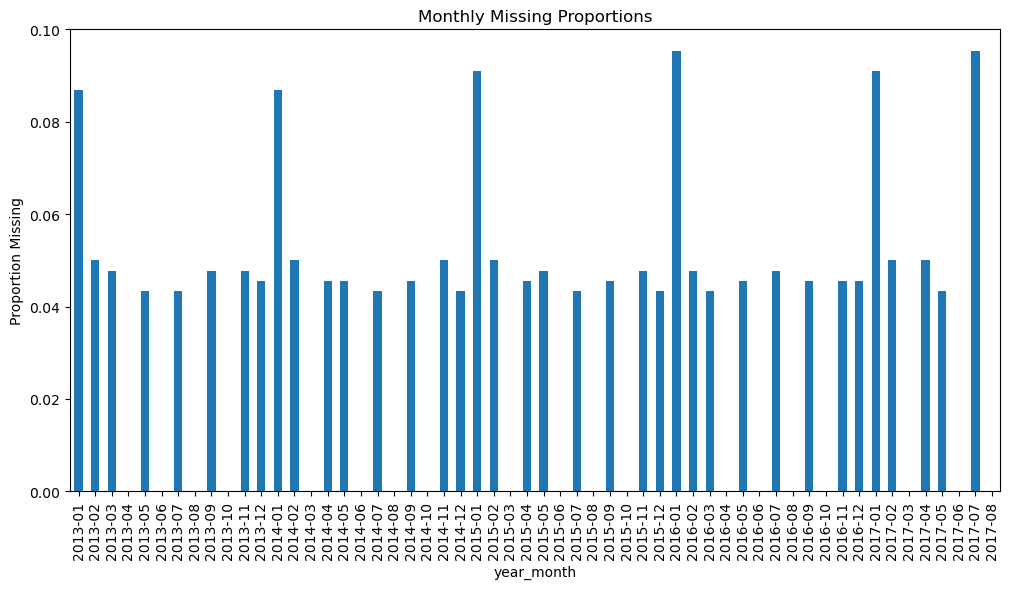

In [27]:
oil_new['date'] = pd.to_datetime(oil_new['date'])
oil_new['year_month'] = oil_new['date'].dt.to_period('M')  # Group by month
missing_by_month = oil_new.groupby('year_month')['dcoilwtico'].apply(lambda x: x.isnull().mean())

print("Missing Proportion by Month:")
print(missing_by_month)


missing_by_month.plot(kind='bar', figsize=(12, 6), title="Monthly Missing Proportions")
plt.ylabel("Proportion Missing")
plt.show()



In [28]:
holiday = holiday_events

In [29]:
holiday['date'] = pd.to_datetime(holiday['date'])
# Merge holidays with oil data
oil_with_holidays = oil.reset_index().merge(holiday, on='date', how='left')

# Check where dcoilwtico is missing and if it's a holiday
missing_on_holidays = oil_with_holidays[oil_with_holidays['dcoilwtico'].isnull() & oil_with_holidays['type'].notnull()]

# Display rows where missing values align with holidays
print(missing_on_holidays[['date', 'type', 'locale', 'locale_name', 'description']])


           date        type    locale    locale_name  \
0    2013-01-01     Holiday  National        Ecuador   
259  2013-12-25     Holiday  National        Ecuador   
264  2014-01-01     Holiday  National        Ecuador   
341  2014-04-18     Holiday  National        Ecuador   
400  2014-07-04       Event  National        Ecuador   
525  2014-12-25     Holiday  National        Ecuador   
531  2015-01-01     Holiday  National        Ecuador   
563  2015-02-16     Holiday  National        Ecuador   
597  2015-04-03     Holiday  National        Ecuador   
664  2015-07-03     Holiday     Local      El Carmen   
665  2015-07-03     Holiday     Local  Santo Domingo   
791  2015-12-25     Holiday  National        Ecuador   
796  2016-01-01     Holiday  National        Ecuador   
856  2016-03-25     Holiday  National        Ecuador   
1055 2016-12-26  Additional  National        Ecuador   
1060 2017-01-02    Transfer  National        Ecuador   
1134 2017-04-14     Holiday     Local       Libe

In [30]:
oil_with_holidays['dcoilwtico'] = oil_with_holidays['dcoilwtico'].interpolate(method='linear')


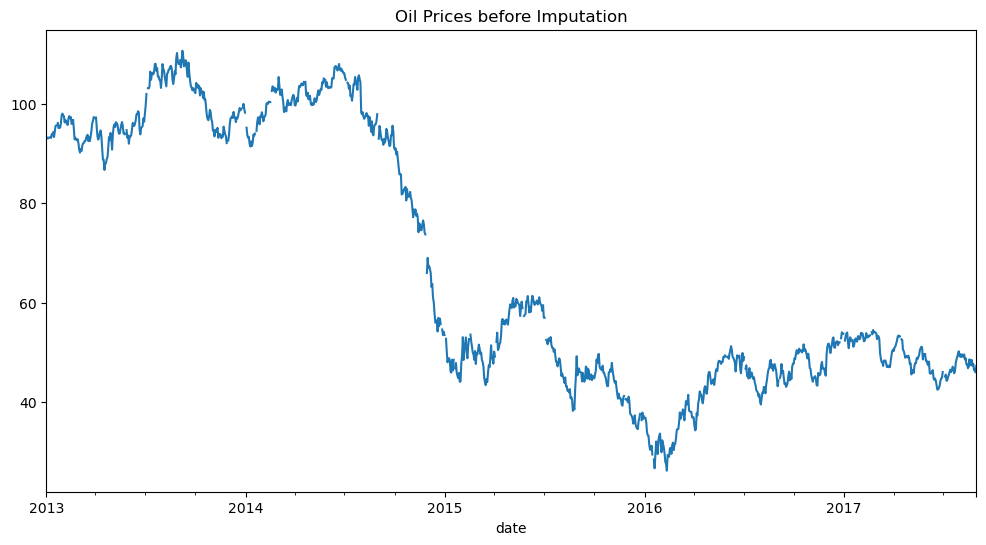

In [31]:
oil_new.set_index('date')['dcoilwtico'].plot(figsize=(12, 6), title="Oil Prices before Imputation")
plt.show()

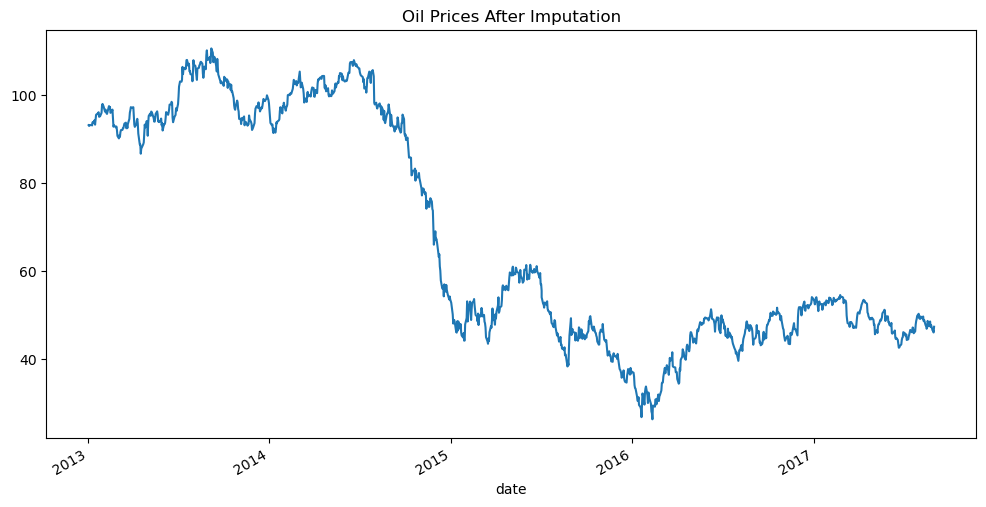

In [32]:
oil_with_holidays.set_index('date')['dcoilwtico'].plot(figsize=(12, 6), title="Oil Prices After Imputation")
plt.show()


In [33]:
print(oil_with_holidays['dcoilwtico'].describe())

count    1235.000000
mean       67.710814
std        25.641074
min        26.190000
25%        46.460000
50%        53.210000
75%        95.715000
max       110.620000
Name: dcoilwtico, dtype: float64


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [35]:
train_data['date'] = pd.to_datetime(train_data['date'])
holiday_events['date'] = pd.to_datetime(holiday_events['date'])
transaction['date'] = pd.to_datetime(transaction['date'])
oil['date'] = pd.to_datetime(oil['date'])
print("Train Date", train_data['date'],"holiday",holiday_events['date'],"transactions ",transaction['date'], "oil",oil['date'])

Train Date 0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
3000883   2017-08-15
3000884   2017-08-15
3000885   2017-08-15
3000886   2017-08-15
3000887   2017-08-15
Name: date, Length: 3000888, dtype: datetime64[ns] holiday 0     2012-03-02
1     2012-04-01
2     2012-04-12
3     2012-04-14
4     2012-04-21
         ...    
345   2017-12-22
346   2017-12-23
347   2017-12-24
348   2017-12-25
349   2017-12-26
Name: date, Length: 350, dtype: datetime64[ns] transactions  0       2013-01-01
1       2013-01-02
2       2013-01-02
3       2013-01-02
4       2013-01-02
           ...    
83483   2017-08-15
83484   2017-08-15
83485   2017-08-15
83486   2017-08-15
83487   2017-08-15
Name: date, Length: 83488, dtype: datetime64[ns] oil 0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-07
          ...    
1213   2017-08-25
1214   2017-08-28
1215   2017-08-29
1216   2017-08-30
1217   20

In [36]:
updated_train_data = pd.merge(train_data, holiday_events, on='date', how='left')

In [37]:
updated_train_data.tail()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [38]:
updated_train_data = updated_train_data.merge(transaction, on=['store_nbr','date'], how='left')

In [39]:
updated_train_data.tail()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,transactions
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0


In [40]:
updated_train_data = updated_train_data.merge( oil, on='date', how='left')
updated_train_data.tail()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,transactions,dcoilwtico,is_missing,year_month
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08


In [41]:
updated_train_data = pd.merge(updated_train_data, stores, on='store_nbr', how='left')
updated_train_data.tail()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,transactions,dcoilwtico,is_missing,year_month,city,state,type_y,cluster
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08,Quito,Pichincha,B,6
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,False,2017-08,Quito,Pichincha,B,6


In [42]:
remove_cols = ['is_missing', 'year_month']
updated_train_data = updated_train_data.drop(columns=remove_cols)
updated_train_data.tail()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,transactions,dcoilwtico,city,state,type_y,cluster
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6


In [43]:
updated_train_data.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions     249117
dcoilwtico       955152
city                  0
state                 0
type_y                0
cluster               0
dtype: int64

In [44]:
updated_train_data['dcoilwtico'] = updated_train_data['dcoilwtico'].ffill().bfill()

In [45]:
updated_train_data.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,transactions,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,93.14,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,93.14,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,93.14,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,93.14,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,93.14,Quito,Pichincha,D,13


In [46]:
updated_train_data.to_csv('data.csv', index=False)

In [47]:
updated_train_data.tail()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,transactions,dcoilwtico,city,state,type_y,cluster
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,47.57,Quito,Pichincha,B,6


In [48]:
print("Train data range :" ,train_data['date'].min() ,"to", train_data['date'].max())
print("holiday data range :" ,holiday_events['date'].min() ,"to", holiday_events['date'].max())
print("oil data range :" ,oil['date'].min() ,"to", oil['date'].max())
print("transaction data range :" ,transaction['date'].min() ,"to", transaction['date'].max())

Train data range : 2013-01-01 00:00:00 to 2017-08-15 00:00:00
holiday data range : 2012-03-02 00:00:00 to 2017-12-26 00:00:00
oil data range : 2013-01-01 00:00:00 to 2017-08-31 00:00:00
transaction data range : 2013-01-01 00:00:00 to 2017-08-15 00:00:00


In [49]:
print("Train data range :" ,train_data['store_nbr'].min() ,"to", train_data['store_nbr'].max())
print("store data range :" ,stores['store_nbr'].min() ,"to", stores['store_nbr'].max())
print("transaction data range :" ,transaction['store_nbr'].min() ,"to", transaction['store_nbr'].max())

Train data range : 1 to 54
store data range : 1 to 54
transaction data range : 1 to 54


In [50]:
test_data = pd.read_csv("test.csv")
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [51]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [52]:
test_data = test_data.merge(stores, on='store_nbr', how='left')
test_data = test_data.merge(oil, on='date', how='left')
test_data = test_data.merge(transaction, on=['store_nbr','date'], how='left')
test_data = test_data.merge(holiday_events, on='date', how='left')

In [53]:
test_data.tail()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,dcoilwtico,is_missing,year_month,transactions,type_y,locale,locale_name,description,transferred
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,47.26,False,2017-08,NaN,NaN,NaN,NaN,NaN,NaN
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,47.26,False,2017-08,NaN,NaN,NaN,NaN,NaN,NaN
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,47.26,False,2017-08,NaN,NaN,NaN,NaN,NaN,NaN
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,47.26,False,2017-08,NaN,NaN,NaN,NaN,NaN,NaN
28511,3029399,2017-08-31,9,SEAFOOD,0,Quito,Pichincha,B,6,47.26,False,2017-08,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
updated_train_data['day_of_week'] = pd.to_datetime(updated_train_data['date']).dt.dayofweek
test_data['day_of_week'] = pd.to_datetime(test_data['date']).dt.dayofweek

In [55]:
median_transaction = updated_train_data['transactions'].mean()
updated_train_data['transactions'] =  updated_train_data['transactions'].fillna(median_transaction)

In [56]:
features = ['store_nbr','onpromotion','dcoilwtico','cluster','transactions','day_of_week']
features_for_test = ['store_nbr','onpromotion','dcoilwtico','cluster','transactions','day_of_week']

In [57]:
updated_train_data.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,transactions,dcoilwtico,city,state,type_y,cluster,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,1697.071441,93.14,Quito,Pichincha,D,13,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,1697.071441,93.14,Quito,Pichincha,D,13,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,1697.071441,93.14,Quito,Pichincha,D,13,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,1697.071441,93.14,Quito,Pichincha,D,13,1
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,1697.071441,93.14,Quito,Pichincha,D,13,1


In [58]:
test_data = test_data.rename(columns={'city_x':'city', 'state_x':'state', 'cluster_x':'cluster'})



In [59]:
test_data.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
type_x              0
cluster             0
dcoilwtico       7128
is_missing       7128
year_month       7128
transactions    28512
type_y          26730
locale          26730
locale_name     26730
description     26730
transferred     26730
day_of_week         0
dtype: int64

In [60]:
X_train = pd.get_dummies(updated_train_data[features])
y_train = updated_train_data['sales']



In [61]:

y_train = y_train[X_train.index]  
X_test = pd.get_dummies(test_data[features_for_test])

In [62]:
X_train, X_val, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [63]:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    scores = {'Training MAE': mean_absolute_error(y_train,train_preds),
              'Valid MAE':mean_absolute_error(y_valid,val_preds),
              'Training RMSLE': np.sqrt(mean_squared_log_error(y_train,train_preds)),
              'Valid RMSLE': np.sqrt(mean_squared_log_error(y_valid,val_preds)),
              'Training R^2': r2_score(y_train,train_preds),
              'Valid R^2': r2_score(y_valid,val_preds)}
    return scores 


In [64]:
param_distributions = {
    'n_estimators': randint(10, 50),        
    'max_depth': [ 10, 20, 30],     
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['auto', 'sqrt', 'log2']
}

In [65]:
model_RFG = RandomForestRegressor(n_jobs=-1, random_state=42)
random_search = RandomizedSearchCV(estimator=model_RFG, param_distributions=param_distributions, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [66]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=17; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time= 2.0min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=42; total time= 1.9min


/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=28; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time= 2.0min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=42; total time= 1.9min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=17; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time= 2.0min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=42; total time= 1.9min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=17; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=33; total time= 2.0min
[CV] END max_depth=20, max_features=sqrt, min_

/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
95 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/rojalpradhan/miniforge3/envs/college/lib/python3.9/site-packages/sklearn/base.py", 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3457c03d0>},
                   random_state=42, verbose=2)

In [68]:
model = random_search.best_estimator_

In [69]:
show_scores(model)

{'Training MAE': 309.2996229051892,
 'Valid MAE': 334.6643658783155,
 'Training RMSLE': 2.9266148295484458,
 'Valid RMSLE': 2.9504718050426626,
 'Training R^2': 0.5593420558842452,
 'Valid R^2': 0.4606585472605321}